In [1]:
import pandas as pd
import numpy as np
import pickle
import os

import altair as alt


# importing local libraries for drawings (because they clutter)
# in Github, you can search  
#   They should still be available within the git repo but it's pretty much template stuff from altair
import sys
sys.path.append('../')
sys.path.append('../../')
from lib.builders import people,towns,nations,culture as c
import lib.drawMaps as draw

with (open('world_1.p', 'rb')) as pickle_file:
    world = pickle.load(pickle_file)
    
world

In [2]:
c.Names(paths='notebooks')

In [3]:
culture = c.Culture(paths='notebooks')
culture.eons

10

# The age of the ancients

the terrain and all of the natural features are formed in the first age. Mountains, rivers, lakes, forrests. Once the land has settle, the first cities appear. 

Culture settings come from the user input, there are defaults for everything. Once specified the `.culture` placeholder can be replaced. It should not be used until this point. 

In [4]:
world.culture = culture

#### Blank world from the `landscape` age

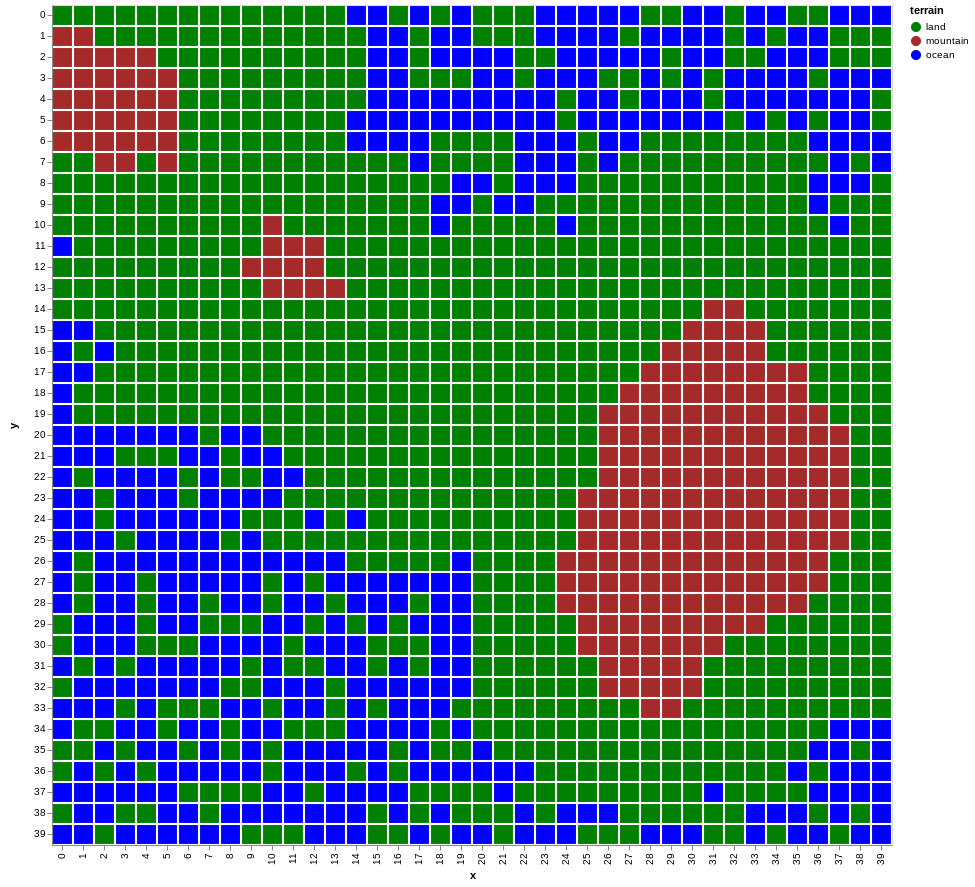

In [5]:
draw.drawTerrainTypes(world.grid_elevation,world.landscape)

the `__init__` method of a city takes a founding age and a location (which can be generated randomly via `World.get_random_chord`). The init method automatically generates a name. The default nation is the name of the town.

## People
A `Person` is a required parameter for many things like `towns`, `nations` and `buildings`

A person requires a `culture` to specify how the names will be generated. As a default the person is a `peon` and exists nowhere (`None`). Optional parameters allow the person to be created with a `role` and a `location`. `Location` can be a `town`, `building` or a `key` where the person can be found. 

In [6]:
people.Person(world.culture,location=world.get_random_chord())

Ranettag, peon, residing in [ 0 10]

When a new `Town` is created it is created with a person

In [7]:
new_town = towns.Town(world.get_random_chord(),1,culture,people)
new_town

town of Stormrail: population: 1 location: [34,31] founded 1

In [8]:
new_town.speaker

Akicinnish, Speaker of Stormrail, residing in Stormrail

## The age of civilization

Cities grow for a set number of aeons. During each eon
* n new villages are born
* each village has g% chance to grow

at the end of this age cities merge together to become nations. 

In [9]:
all_towns = towns.build_towns(world,people)
all_towns

[town of Camcombe: population: 3 location: [9,24] founded 0,
 town of Lionrest: population: 5 location: [4,11] founded 0,
 town of Fallglen: population: 4 location: [16,16] founded 0,
 town of Oakrun: population: 4 location: [15,33] founded 1,
 town of Stormhost: population: 3 location: [34,17] founded 1,
 town of Coremark: population: 2 location: [23,37] founded 2,
 town of Fallrise: population: 3 location: [7,16] founded 2,
 town of Godchild: population: 2 location: [19,37] founded 2,
 town of Splitrest: population: 2 location: [18,39] founded 3,
 town of Rocktown: population: 1 location: [22,12] founded 3,
 town of Ravenfold: population: 3 location: [36,15] founded 4,
 town of Artcrawl: population: 4 location: [14,21] founded 5,
 town of Coreridge: population: 3 location: [4,21] founded 5,
 town of Servantstown: population: 1 location: [3,38] founded 5,
 town of Hellkeep: population: 2 location: [2,6] founded 6,
 town of Servantscraft: population: 3 location: [18,25] founded 7,
 tow

In [10]:
[p.speaker for p in all_towns]

[Studdand, Speaker of Camcombe, residing in Camcombe,
 Farresh, Speaker of Lionrest, residing in Lionrest,
 Thodellorg, Speaker of Fallglen, residing in Fallglen,
 Trutalled, Speaker of Oakrun, residing in Oakrun,
 Voplan, Speaker of Stormhost, residing in Stormhost,
 Fojennis, Speaker of Coremark, residing in Coremark,
 Anaharkoh, Speaker of Fallrise, residing in Fallrise,
 Chibromir, Speaker of Godchild, residing in Godchild,
 Tifiller, Speaker of Splitrest, residing in Splitrest,
 Dodsem, Speaker of Rocktown, residing in Rocktown,
 Pinettag, Speaker of Ravenfold, residing in Ravenfold,
 Quassin, Speaker of Artcrawl, residing in Artcrawl,
 Ulkrackeh, Speaker of Coreridge, residing in Coreridge,
 Xackea, Speaker of Servantstown, residing in Servantstown,
 Aliwallith, Speaker of Hellkeep, residing in Hellkeep,
 Pobbaker, Speaker of Servantscraft, residing in Servantscraft,
 Nenken, Speaker of Corepike, residing in Corepike,
 Alisassud, Speaker of Heirbridge, residing in Heirbridge,
 Ki

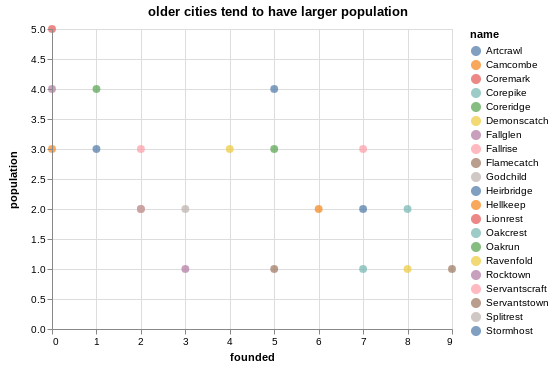

In [11]:
def population_age(towns):
    df = pd.DataFrame(index=range(len(all_towns)))
    df['name'] = [t.name for t in all_towns]
    df['population'] = [t.pop for t in all_towns]
    df['founded'] = [t.founded for t in all_towns]
    return df

alt.Chart(population_age(towns),title="older cities tend to have larger population").mark_circle(size=60).encode(
    y='population',
    x='founded',
    color='name',
    tooltip=['name']
)

There are convinience functions to fetch individual towns. 

In [12]:
towns.get_town(all_towns,all_towns[2].name)

town of Fallglen: population: 4 location: [16,16] founded 0

In [13]:
world.df_features.head()

,y,rainfall,x,key,elevation,terrain
key,,,,,,
0:0,0,32.0,0,0:0,18.0,land
1:0,0,31.0,1,1:0,16.0,land
2:0,0,33.0,2,2:0,15.0,land
3:0,0,36.0,3,3:0,14.0,land
4:0,0,39.0,4,4:0,13.0,land


In [14]:
world.add_features(all_towns)

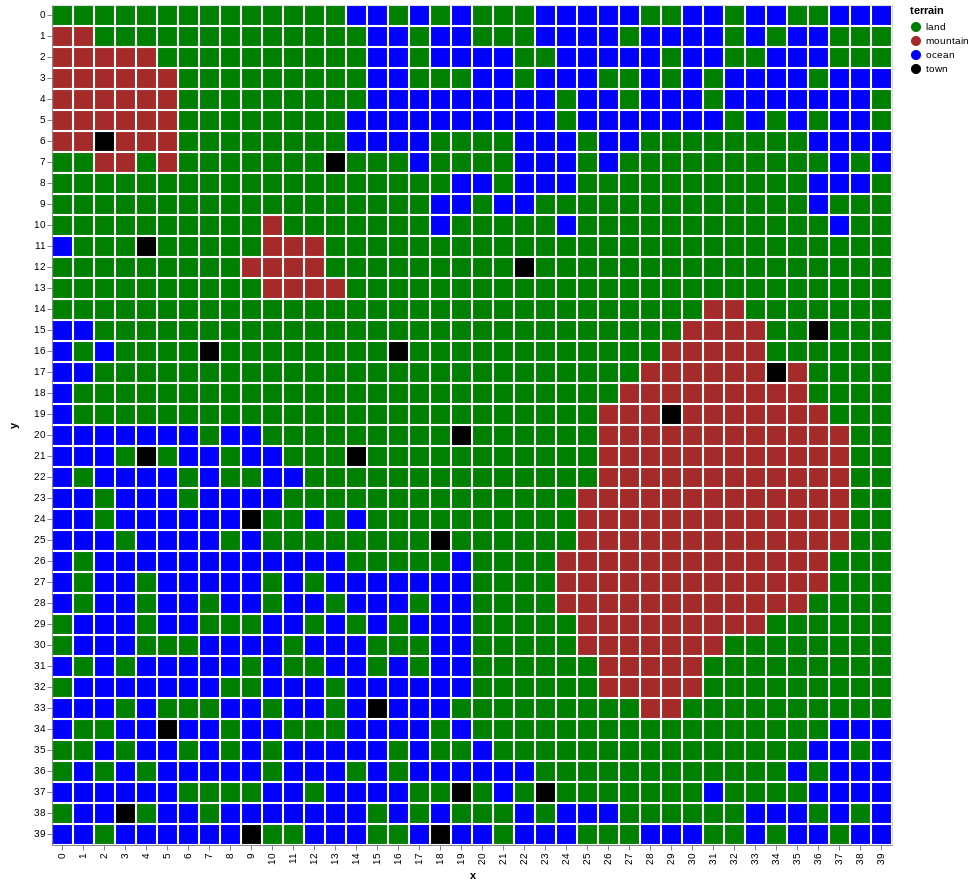

In [15]:
draw.drawCities(world.df_features)

In [16]:
world.df_features[world.df_features['feature'].isna()==False]

,y,rainfall,x,key,elevation,terrain,feature
key,,,,,,,
2:6,6,77.0,2,2:6,34.0,town,Hellkeep
13:7,7,11.0,13,13:7,7.0,town,Corepike
4:11,11,24.0,4,4:11,7.0,town,Lionrest
22:12,12,7.0,22,22:12,5.0,town,Rocktown
36:15,15,43.0,36,36:15,14.0,town,Ravenfold
7:16,16,35.0,7,7:16,8.0,town,Fallrise
16:16,16,33.0,16,16:16,16.0,town,Fallglen
34:17,17,48.0,34,34:17,25.0,town,Stormhost
29:19,19,72.0,29,29:19,58.0,town,Heirbridge


In [17]:
#k is the actual k_means cluster object.
all_nations,k = nations.cluster_nations(world)

world.nations = all_nations

all_nations

{0: 'Magecrawl',
 1: 'Snakechild',
 2: 'Artjaw',
 3: 'Raventear',
 4: 'Brinepike',
 5: 'Arthenge',
 6: 'Lordsjaw',
 7: 'Rockhenge'}

In [18]:
k

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [19]:
world.df_features = nations.predict_nations(k,world)
world.df_features.head(20)

,y,rainfall,x,key,elevation,terrain,feature,nation number,nation
key,,,,,,,,,
0:0,0,32.0,0,0:0,18.0,land,NaN,4.0,Brinepike
1:0,0,31.0,1,1:0,16.0,land,NaN,4.0,Brinepike
2:0,0,33.0,2,2:0,15.0,land,NaN,4.0,Brinepike
3:0,0,36.0,3,3:0,14.0,land,NaN,4.0,Brinepike
4:0,0,39.0,4,4:0,13.0,land,NaN,4.0,Brinepike
5:0,0,35.0,5,5:0,13.0,land,NaN,4.0,Brinepike
6:0,0,30.0,6,6:0,11.0,land,NaN,4.0,Brinepike
7:0,0,29.0,7,7:0,7.0,land,NaN,4.0,Brinepike
8:0,0,33.0,8,8:0,7.0,land,NaN,4.0,Brinepike


In [20]:
world.towns

In [21]:
world.towns = all_towns
for t in all_towns:
    try:
        t.set_starting_fielty(world)
    except:
        continue
        
town = world.towns[1]
print(f"{town.name} is loyal to the nation of {town.nation}")
print(f"{town.diplomacy}")

Lionrest is loyal to the nation of Brinepike
{'nation': 'Brinepike', 'national fealty': 1}


In [22]:
#for each nation (n), appoint the most populus city (c) as it's capitol.
for n in np.unique(world.df_features['nation'].dropna()):
    c = world.df_features[(world.df_features['nation']==n)& \
          (world.df_features['terrain']=='town')]['feature'].tolist()
    #getting the town objects
    ts = [t for t in all_towns if t.name in c]
    #get population(p)
    p = [t.pop for t in ts]
    #getting the first town that has the max population, make that the capitol
    ts[np.argmax(p)].type='capitol'
    
all_towns

[capitol of Camcombe: population: 3 location: [9,24] founded 0,
 capitol of Lionrest: population: 5 location: [4,11] founded 0,
 capitol of Fallglen: population: 4 location: [16,16] founded 0,
 capitol of Oakrun: population: 4 location: [15,33] founded 1,
 capitol of Stormhost: population: 3 location: [34,17] founded 1,
 town of Coremark: population: 2 location: [23,37] founded 2,
 town of Fallrise: population: 3 location: [7,16] founded 2,
 town of Godchild: population: 2 location: [19,37] founded 2,
 town of Splitrest: population: 2 location: [18,39] founded 3,
 capitol of Rocktown: population: 1 location: [22,12] founded 3,
 town of Ravenfold: population: 3 location: [36,15] founded 4,
 capitol of Artcrawl: population: 4 location: [14,21] founded 5,
 town of Coreridge: population: 3 location: [4,21] founded 5,
 town of Servantstown: population: 1 location: [3,38] founded 5,
 town of Hellkeep: population: 2 location: [2,6] founded 6,
 town of Servantscraft: population: 3 location: [1

In [23]:
world.nations = [nations.Nation(n,world,world.culture,people) for n in world.nations.values()]
world.nations

[Nation of Magecrawl,
 Nation of Snakechild,
 Nation of Artjaw,
 Nation of Raventear,
 Nation of Brinepike,
 Nation of Arthenge,
 Nation of Lordsjaw,
 Nation of Rockhenge]

In [24]:
world.nations[0].ruler

Tarandoth, Ruler of the nation of Magecrawl, residing in Artcrawl

In [25]:
world.df_features[world.df_features['feature'].isna()==False].sort_values(['nation'])

,y,rainfall,x,key,elevation,terrain,feature,nation number,nation
key,,,,,,,,,
22:12,12,7.0,22,22:12,5.0,town,Rocktown,5.0,Arthenge
36:15,15,43.0,36,36:15,14.0,town,Ravenfold,2.0,Artjaw
34:17,17,48.0,34,34:17,25.0,town,Stormhost,2.0,Artjaw
29:19,19,72.0,29,29:19,58.0,town,Heirbridge,2.0,Artjaw
2:6,6,77.0,2,2:6,34.0,town,Hellkeep,4.0,Brinepike
4:11,11,24.0,4,4:11,7.0,town,Lionrest,4.0,Brinepike
3:38,38,1.0,3,3:38,1.0,town,Servantstown,6.0,Lordsjaw
9:39,39,1.0,9,9:39,1.0,town,Demonscatch,6.0,Lordsjaw
5:34,34,4.0,5,5:34,2.0,town,Oakcrest,6.0,Lordsjaw


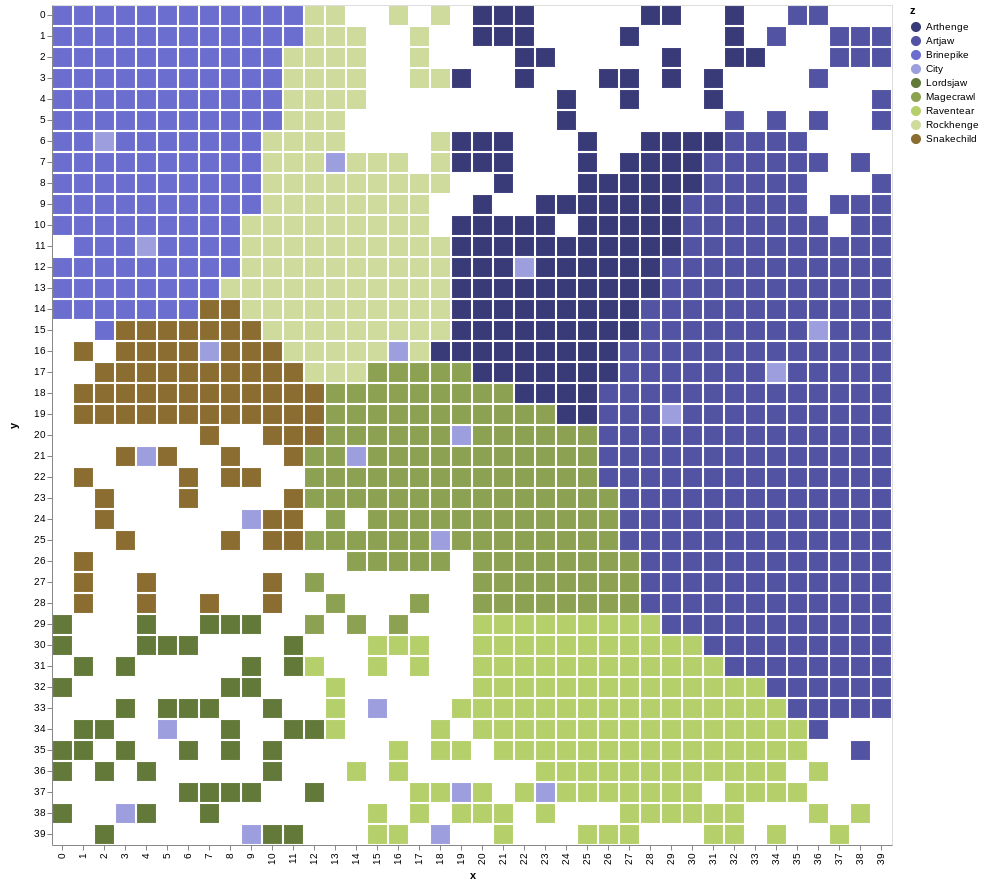

In [26]:
draw.drawboarders(world.df_features)

In [27]:
world.towns = all_towns

with open('world_2.p', 'wb') as pickle_file:
    pickle.dump(world, pickle_file)